In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines
from scipy.stats import norm

## Disclaimer
This notebook based on labs from Inferential Statistics course by Duke University from https://www.coursera.org/learn/inferential-statistics-intro <br>
I adapted R code from these labs and reproduced in Jupyter Notebooks and rewrote in Python

## The data
We consider real estate data from the city of Ames, Iowa. This is the same dataset used in the previous lab. The details of every real estate transaction in Ames is recorded by the City Assessor’s office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let’s load the data.

In [2]:
data_frame = pd.read_csv("https://raw.githubusercontent.com/AntonIsHere/Inferetial_Statistics/master/ames.csv")
# print(data_frame)
# data_frame.to_csv(output_file, index=False)
area = data_frame['area']

In this lab we’ll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we’ll focus on the size of the house, represented by the variable area.

In [3]:
n = 60
#data_frame.sample(n, replace=True)

## Confidence intervals

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as x¯ (here we’re calling it x_bar). That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This uncertainty can be quantified using a confidence interval.

A confidence interval for a population mean is of the following form

$$\hat{x} \pm z*\frac{s}{\sqrt{n}}$$

What does “95% confidence” mean?

- 95% of random samples of size 60 will yield confidence intervals that contain the true average area of houses in Ames, Iowa.

You should by now be comfortable with calculating the mean and standard deviation of a sample in Python. And we know that the sample size is 60. So the only remaining building block is finding the appropriate critical value for a given confidence level. We can use the qnorm function for this task, which will give the critical value associated with a given percentile under the normal distribution. Remember that confidence levels and percentiles are not equivalent. For example, a 95% confidence level refers to the middle 95% of the distribution, and the critical value associated with this area will correspond to the 97.5th percentile.

We can find the critical value for a 95% confidence interal using

In [4]:
z_star_95 = norm.ppf(.975)
z_star_95

1.959963984540054

which is roughly equal to the value critical value 1.96 that you’re likely familiar with by now.

Let’s finally calculate the confidence interval:

In [5]:
d = {'lower': [np.average(area) - z_star_95 * (np.std(area)/np.sqrt(n))], 
     'upper': [np.average(area) + z_star_95 * (np.std(area)/np.sqrt(n))]}
Conf_interval = pd.DataFrame(data = d)
Conf_interval

,lower,upper
0,1371.803227,1627.577661


To recap: even though we don’t know what the full population looks like, we’re 95% confident that the true average size of houses in Ames lies between the values lower and upper. There are a few conditions that must be met for this interval to be valid.

Using Python, we’re going to collect many samples to learn more about how sample means and confidence intervals vary from one sample to another.

Here is the rough outline:

* Obtain a random sample.
* Calculate the sample’s mean and standard deviation, and use these to calculate and store the lower and upper bounds of the confidence intervals.
* Repeat these steps 50 times.

We can accomplish this using the rep_sample_n function. The following lines of code takes 50 random samples of size n from population (and remember we defined n=60 earlier), and computes the upper and lower bounds of the confidence intervals based on these samples.

In [6]:
CI = pd.DataFrame(columns=('lower', 'upper'))


for i in range(50):
    d1 = data_frame.sample(n, replace=True)
    intervals = pd.DataFrame(data = {'lower': [np.average(d1['area']) - z_star_95 * (np.std(d1['area'])/np.sqrt(n))], 
     'upper': [np.average(d1['area']) + z_star_95 * (np.std(d1['area'])/np.sqrt(n))]})
    CI = pd.concat([CI, intervals], ignore_index = True)
    CI.loc[i,'capture_mu'] = 'yes' if CI.loc[i,'lower'] < np.average(area) and CI.loc[i,'upper'] > np.average(area) else 'no'
CI.reset_index(inplace=True)
#CI

## Dumbell Plot

Let's visualise our confidence intervals using Dumbell Plot to see how these intervals vary from one sample to another

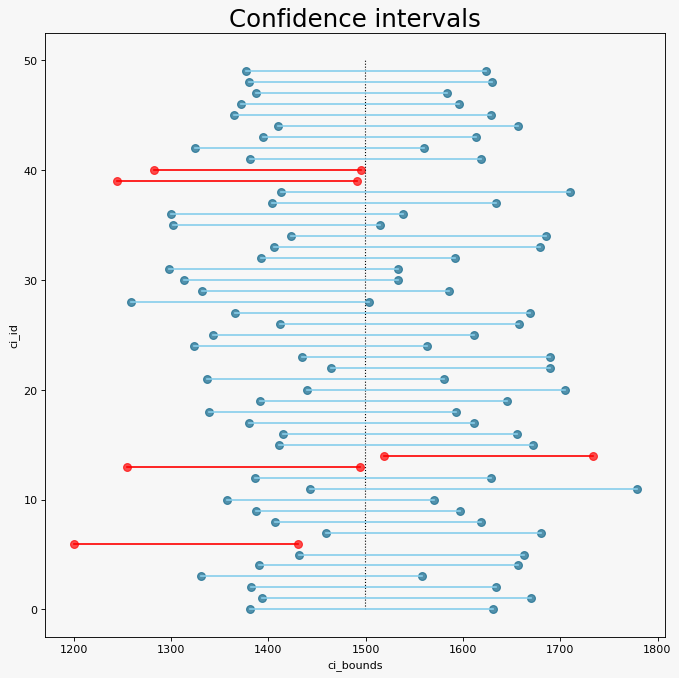

In [7]:
# Func to draw line segment
def newline(p1, p2, p3, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color = 'skyblue' if p3[0] == 'yes' else 'red') 
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(10,10), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=np.average(area), ymin=0, ymax=50, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Labels
ax.set_xlabel("ci_bounds")
ax.set_ylabel("ci_id")

# Line Segments and Points
for i, p1, p2, p3 in zip(CI['index'], CI['lower'], CI['upper'], CI['capture_mu']):
    newline([p1, i], [p2, i], [p3, i])    
    ax.scatter(y=CI.loc[i,'index'], x=CI.loc[i,'lower'], s=50, color='#0e668b' if CI.loc[i,'capture_mu'] == 'yes' else 'red', alpha=0.7)
    ax.scatter(y=CI.loc[i,'index'], x=CI.loc[i,'upper'], s=50, color='#0e668b' if CI.loc[i,'capture_mu'] == 'yes' else 'red', alpha=0.7)


# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Confidence intervals", fontdict={'size':22}) 

plt.show()
